# 전설의 포켓몬을 찾아서!

포켓몬 데이터셋을 가지고 실습을 해봅시다!

포켓몬의 이름, 속성 또는 공격력이나 방어력 등과 같은 스탯 값만을 가지고 전설의 포켓몬인지 아닌지를 구별해내 봅시다!

데이터를 밑바닥부터 샅샅이 뜯어보는 연습을 하려고 합니다. 이런 과정을 **탐색적 데이터 분석(Exploratory Data Analysis, 이하 EDA)** 라고 합니다. EDA는 더 좋은 데이터 분석과 더 좋은 머신러닝 모델을 만들기 위해 필수적인 과정입니다.


## 1. 데이터 불러오기

가장 먼저 데이터를 불러와봅시다!

포켓몬 데이터는 캐글 사이트에 올라와있습니다.

- [\[Kaggle\] Pokemon with stats](https://www.kaggle.com/abcsds/pokemon)

다운로드 해서 `/data` 폴더에 넣어봅시다!

필요한 모듈들을 import해봅시다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [2]:
import os

csv_path = os.path.dirname(os.path.abspath('__file__'))
csv_path += r'/data/Pokemon.csv'
original_data = pd.read_csv(csv_path)

In [5]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head(10)

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


데이터는 총 800행, 13열로 이루어져 있습니다. 이 중 우리가 타겟으로 두고 확인할 데이터는 `Legendary`(전설의 포켓몬인지 아닌지의 여부)이므로, `Legendary==True` 값을 가지는 레전드 포켓몬 데이터셋은 `legendary` 변수에, `Legendary==False`값을 가지는 일반 포켓몬 데이터셋은 `ordinary` 변수에 저장해두겠습니다.

In [6]:
legendary = pokemon[pokemon['Legendary'] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head(10)

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
5,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
6,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
7,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
8,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
9,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True


In [7]:
ordinary = pokemon[pokemon['Legendary'] == False].reset_index(drop = True)
print(ordinary.shape)
ordinary.head(10)

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


전설의 포켓몬은 65개, 일반 포켓몬은 735개가 있네요. 그럼 이제 데이터들을 분석해봅시다!!


## 2. 데이터 분석하기

### 2.1 빈 데이터 확인하기

데이터를 다루기 전 가장 먼저 해야할 것! 바로 빈 데이터(결측치) 먼저 확인하겠습니다.

In [8]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

`Type 2` 칼럼에만 총 386개의 결측치가 있네요. `Type 1`이 있고 `Type 2`도 있으므로 뭔가 두번째 속성이 없는 포켓몬이 있는 것 같습니다.

데이터셋을 다룰 때 *빈 데이터를 다루는 것은 매우 조심스러운 일입니다.* 데이터셋의 성격에 따라 빈 데이터를 어떻게 다루어야 할지에 대한 방법이 달라지기 때문이죠. 일단 전체 칼럼부터 이해하고 이 결측치들을 어떻게 다룰지 생각해봅시다!

### 2.2 전체 칼럼 살펴보기

데이터가 800개이고, 칼럼이 13개로 큰 데이터셋이 아니므로, 최대한 모든 데이터들을 하나하나 이해해볼 수 있겠습니다.

In [12]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

각 칼럼이 의미하는 바는 다음과 같습니다. 


- \# : 포켓몬 Id number. 같은 포켓몬이지만 성별이 다른 경우 등은 같은 #값을 가진다. `int`
- Name : 포켓몬 이름. 포켓몬 각각의 이름으로, 이름 데이터는 800개의 포켓몬이 모두 다르다. (unique) `str`
- Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. `str`
- Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. `str`
- Total : 전체 6가지 스탯의 총합. `int`
- HP : 포켓몬의 체력. `int`
- Attack : 물리 공격력. (scratch, punch 등) `int`
- Defense : 물리 공격에 대한 방어력. `int`
- Sp. Atk : 특수공격력. (fire blast, bubble beam 등) `int`
- Sp. Def : 특수공격에 대한 방어력. `int`
- Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) `int`
- Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. `int`
- Legendary : 전설의 포켓몬 여부. *!!Target feature!!* `bool`

그럼 column 하나하나 살펴봅시다!

#### `#` : ID Number

가장 첫 번째 칼럼입니다. 바로 #라고 쓰여있는 ID 칼럼이죠. 몇 종류의 column이 있는지 확인해봅시다.

In [13]:
len(set(pokemon['#']))

721

전체 데이터는 총 800개인데, `#` 칼럼을 집합으로 만든 자료형은 그보다 작은 721개의 데이터를 가집니다. 파이썬의 집합(set) 자료형은 중복 데이터를 가질 수 없습니다. 즉, `#` 칼럼의 값은 unique하지 않으며 같은 번호를 가지는 칼럼들이 있음을 알 수 있습니다.

같은 `#`값을 가지는 포켓몬을 한번 확인해봅시다!

In [14]:
pokemon[pokemon['#'] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


예를 들어 \#6의 포켓몬은 `Charizard`, `CharizardMega Charizard X`, `CharizardMega Charizard Y` 세 개로 나뉩니다. <br/>
기본 포켓몬인 `Charizard`로부터 시작해서 진화한 `Meaga Charizard`가 있고, `X`, `Y`는 성별을 나타내는 것으로 보입니다.


#### `Name` : 이름

이름은 문자열로 나타나는 데이터입니다. 한번 중복되는 이름이 있는지 확인해봅시다.

In [15]:
len(set(pokemon['Name']))

800

이름 데이터는 unique하군요!!

<br/>

#### `Type ` & `Type 2` : 포켓몬의 속성

이제 포켓몬의 속성 차례입니다. 피카츄(전기), 파이리(불) 등의 속성을 가지고 있죠!

한번 무작위로 두마리의 포켓몬을 살펴봅시다.

In [16]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


6번 포켓몬인 Charizard는 Fire와 Flying 속성을 가지고 있고, 8번 포켓몬인 Wartortle은 Water 속성 한가지만 가지고 있네요!

포켓몬이 가지는 속성은 **기본적으로 하나, 또는 최대 두개까지** 가질 수 있는 것을 알 수 있습니다.

특히, 데이터 셋에서 한개의 속성을 가지는 포켓몬은 `Type 1`에만 속성이 표시되고, `Type 2`에는 NaN 값이 들어가 있습니다.

그럼 각 속성의 종류는 총 몇가지인지 알아봅시다.

In [17]:
len(list(set(pokemon['Type 1']))), len(list(set(pokemon['Type 2'])))

(18, 19)

`Type 1`에는 총 18가지, `Type 2`에는 총 19가지 속성이 들어가있습니다. 왜 Type 2가 한가지 더 많을까요?

각자를 집합으로 만들어 차집합을 확인해봅시다.

In [19]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

둘의 차집합은 바로 `NaN` 값이네요!

따라서 `NaN` 데이터 외의 나머지 18가지 속성은 `Type 1`, `Type 2` 모두 같은 셋트의 데이터가 들어가 있음을 알 수 있습니다.

포켓몬들의 모든 Type을 `types` 변수에 저장하겠습니다.

In [20]:
types = list(set(pokemon['Type 1']))
print(len(types))
print(types)

18
['Bug', 'Water', 'Poison', 'Rock', 'Psychic', 'Grass', 'Ice', 'Dragon', 'Ghost', 'Flying', 'Dark', 'Fairy', 'Normal', 'Fire', 'Electric', 'Fighting', 'Ground', 'Steel']


그럼 Type이 단 하나뿐이라면 Type 2의 값은 NaN 값일 것입니다. 

데이터가 비어있는 NaN 값의 개수를 확인하고 싶을 때에는 `isna()` 함수를 이용하면 됩니다.

In [21]:
pokemon['Type 2'].isna().sum()

386

#### `Type 1` 데이터 분포 plot

일반 포켓몬과 전설의 포켓몬 속성 분포가 각각 어떤지 확인해봅시다.

우리의 데이터는 일반 포켓몬보다 전설의 포켓몬 수가 적은 불균형 데이터이기 때문에, 전설의 포켓몬은 따로 시각화를 해줍시다.

다음과 같이 `plt`의 `subplot`을 활용해서 두개의 그래프를 한번에 그리면서 그래프는 `sns(seaborn)`의 `countplot`을 활용하겠습니다. `countplot`은 말 그대로 데이터의 개수를 표시하는 플롯입니다.

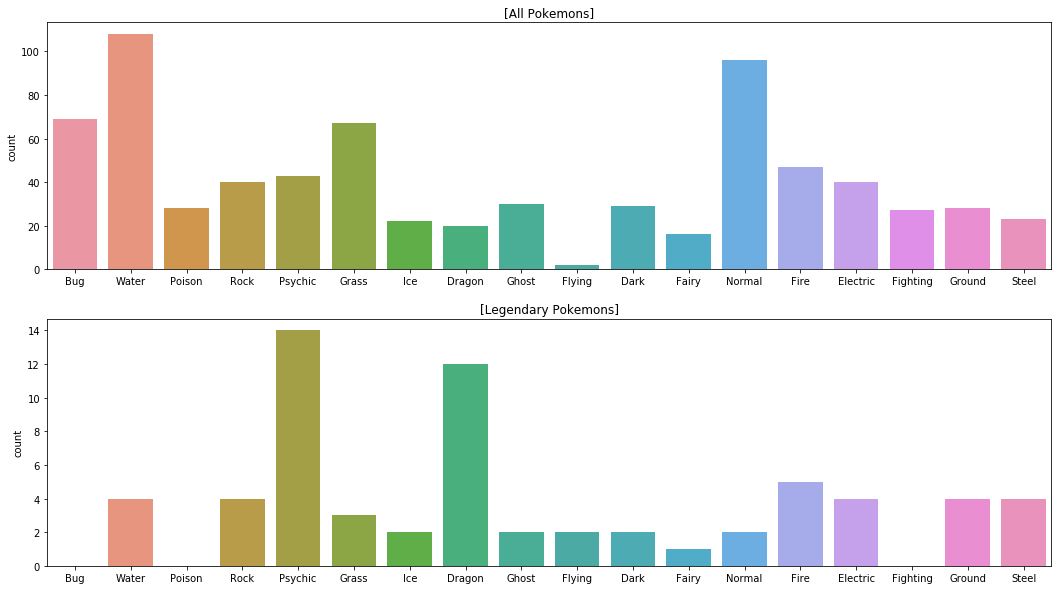

In [23]:
plt.figure(figsize = (18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order = types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order = types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

확실히 일반 포켓몬고 전설의 포켓몬 속성 분포에는 차이가 있는 것 같습니다.

일반 포켓몬에는 Normal, Water의 속성이 가장 많지만, 전설의 포켓몬에는 Dragon, Psychic 속성이 가장 많네요.

그렇다면 **피벗 테이블(Pivot Table)** 로 각 속성에 Legendary 포켓몬들이 몇 퍼센트씩 있는지 확인해봅시다.

`sort_value`를 활용해 높은 것부터 낮은 순으로 정렬해보았습니다.

In [25]:
# Type 1별로 Legendary의 비율을 보여주는 피벗테이블
pd.pivot_table(pokemon, index = 'Type 1', values = 'Legendary').sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


Legendary 비율이 가장 높은 속성은 **Flying**으로, 50%의 비율을 갖습니다. 날아다니는 포켓몬은 꽤 높은 비율로 전설의 포켓몬이네요.

#### `Type 2` 데이터 분포 Plot

그렇다면 `Type 2`는 어떨까요?

참고로 `Type 2`에는 `NaN`(결측값)이 존재했었습니다. Countplot을 그릴 때에는 *결측값은 자동으로 제외됩니다.*


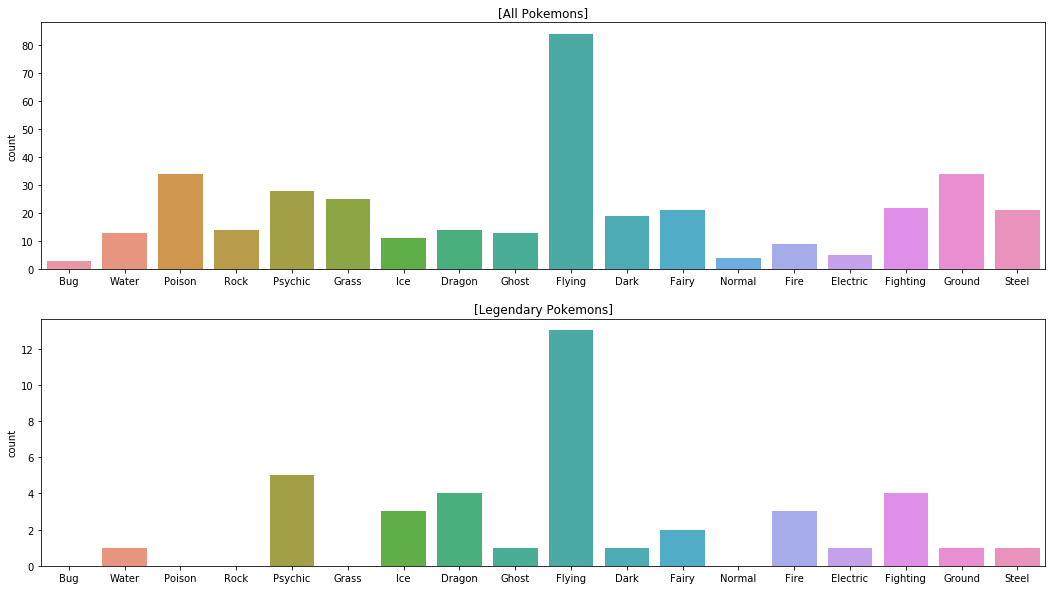

In [29]:
plt.figure(figsize = (18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x='Type 2', order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x='Type 2', order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

Type 2 또한 일반 포켓몬과 전설의 포켓몬 분포 차이가 납니다.

Flying 속성의 경우 두 경우 다 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없습니다.

대신 여전히 Dragon, Psychic과 더불어 Fighting 속성이 많습니다.

역시 피벗 테이블로 한번 확인해봅시다!!

In [30]:
# Type 2별로 Legendary의 비율을 보여주는 피벗테이블!!
pd.pivot_table(pokemon, index = "Type 2", values="Legendary").sort_values(by=['Legendary'], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


Type 2에서는 Fire 속성이 가장 많네요!!

#### `Total` : 모든 스탯의 총 합

데이터셋에서 포켓몬은 총 6가지의 스탯 값을 가집니다. 포켓몬 데이터의 `Total` 칼럼은 이 6가지 속성값의 총합입니다.

모든 스탯의 종류를 `stats`라는 변수에 저장해보겠습니다.

In [31]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

실제로 6개의 스탯의 총합과 데이터에 제공된 `Total`값이 맞는지 확인해봅시다. 데이터 분석에서 검증은 필수!!

첫 번째 포켓몬을 한번 검증해봅시다.

In [32]:
print("#0 pokemon : {}\n".format(pokemon.loc[0, "Name"]))
print("Total :", int(pokemon.loc[0, "Total"]))
print("stats :", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon : Bulbasaur

Total : 318
stats : [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [33]:
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

800

네, `Total`값과 모든 `stats`의 총합이 같은 포켓몬은 전체 데이터의 수와 같은 800마리이군요.
<br/>전부 다 같은 것을 확인하였습니다.

#### `Total` 값에 따른 분포 Plot

그럼 total 값과 legendary는 어떤 관계가 있을까요?

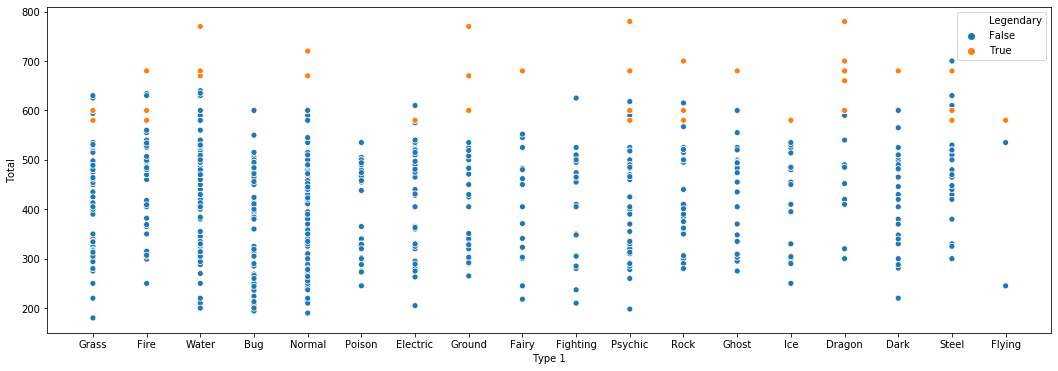

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

Legendary 여부에 따라 색깔(hue)을 달리하도록 했습니다. 점의 색깔을 보면 Type 1 별로 Total 값을 확인했을 때, **전설의 포켓몬은 주로 Total 스탯 값이 높다는 것이 확인**됩니다.


전설의 포켓몬은 왕 쎄군요..!


#### 세부 스탯 : `HP`, `Attack`, `Defense`, `Sp.Atk`, `Sp.Def`, `Speed`

그렇다면 각각의 스탯값을 확인해봅시다!

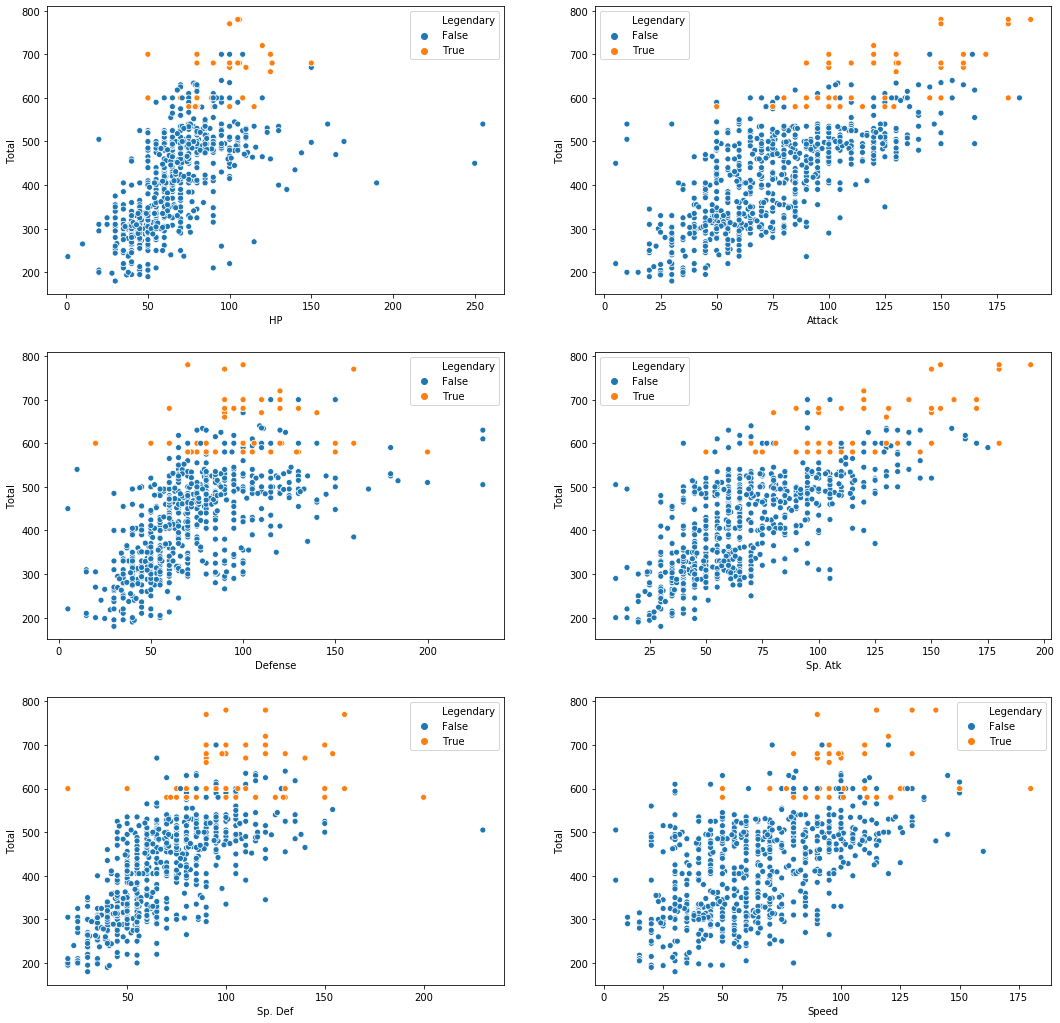

In [40]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 18)

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()


- `HP`, `Defense`, `Sp. Def`
    - 전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있었다.
    - 그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보인다. (ex. 방어형, 공격형 등)
- `Attack`, `Sp. Atk`, `Speed`
    - 이 세 가지 스탯은 Total과 거의 비례한다. 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있다.

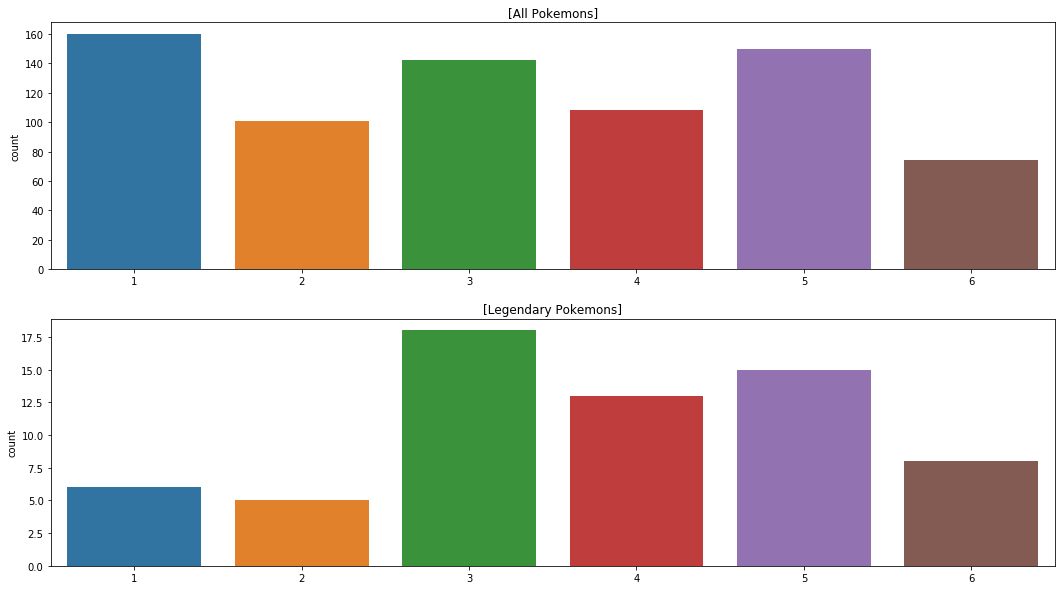

In [41]:
plt.figure(figsize = (18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

전설의 포켓몬은 1, 2세대에는 많지 않네요. 3세대에 갑자기 많아졌다가 6세대는 또 많이 줄어든 것을 확인할 수 있습니다. 


이제 모든 칼럼의 데이터를 확인했습니다. 각각이 가지는 특징들을 세분화해서 확인해봅시다.

#### 전설의 포켓몬의 `Total` 값

먼저 전설의 포켓몬들의 속성 `Total` 값을 확인해봅시다.

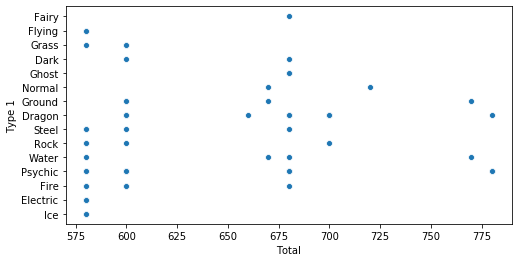

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

헉! 전설의 포켓몬들의 Total 값들이 특정 점들에 모여있네요. 

한번 Total 값들의 집합을 확인해봅시다.

In [43]:
print(sorted(list(set(legendary['Total']))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


실제로 단 9가지 값밖에 존재하지 않습니다. 그래프로도 전설의 포켓몬이 가지는 각 Total 값에 대한 포켓몬의 수를 확인해봅시다. 

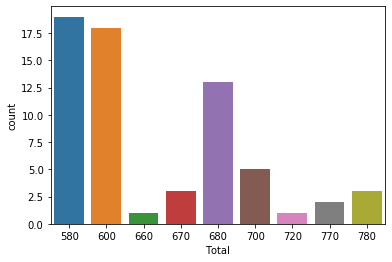

In [45]:
sns.countplot(data=legendary, x='Total')
plt.show()

총 65마리의 전설의 포켓몬이 9개의 `Total`값만을 가진다는 것은 **약 7.22마리끼리는 같은 `Total` 스탯 값을 가진다**는 의미와 같습니다.

그렇다면 ordinary 포켓몬은 어떨까요?

In [47]:
print(sorted(list(set(ordinary['Total']))))
print(len(sorted(list(set(ordinary['Total'])))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]
195


735마리의 포켓몬이 195개의 값을 가진다는 것은 3.77마리만 같은 Total 스탯을 가진다는 것입니다.

즉, 요약하자면

- `Total` 값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 된다. 즉, 전설의 포켓몬의 `Total` 값은 다양하지 않다.
    - **한 포켓몬의 `total` 속성값이 전설의 포켓몬의 값들 집합에 포함되는지 여부**는 전설의 포켓몬임을 결정하는 데에 영향을 미친다.
- 또한, **전설의 포켓몬의 `Total`값 중에는 일반 포켓몬이 가지지 못하는 `Total`값이 존재한다.** ex. 680, 720, 770, 780
    - `Total` 값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로 영향을 미칠 수 있다.
    
    
즉, `Total` 값은 `legendary`인지 아닌지를 예측하는데 중요한 칼럼이 되겠습니다!